<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2023-2024/Practiques/Pr2_SorollGaussi%C3%A0_(solucions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pràctica 2: Soroll i correlacions** [Solucions]


# **Context**

En aquesta pràctica treballarem la generació de números aleatoris que segueixen una distribució uniforme, una distribució gaussiana, i el càlcul de factors de correlació.

### <font color='orange'>**> Python #1**</font>

1.   Genera 10000 punts que segueixin una distribució uniforme entre 0 i 10 i fes un histograma normalitzat.

2.   Genera 10000 punts que segueixin una distribució gaussiana centrada a 5 amb una $\sigma$ de 3 i fes un histograma normalitzat.

Pots fer servir les llibreries de scipy o de numpy:

```
import numpy as np
from scipy import stats
stats.norm.rvs(loc=5,scale=3,size=N)
stats.uniform.rvs(loc=0, scale=10, size=N)
np.random.uniform(low=0, high=10, size=N)
```



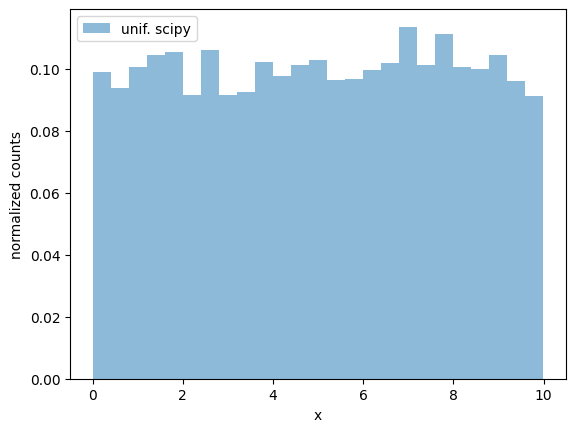

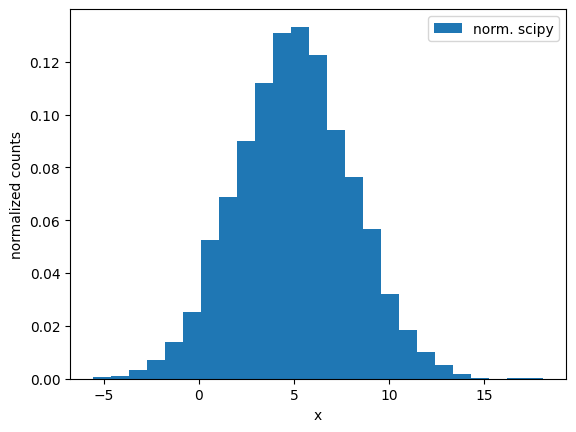

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N = 10000

d_unif = np.random.uniform(low=0, high=10, size=N)
d_unif2 = stats.uniform.rvs(loc=0, scale=10, size=N)

plt.hist(d_unif2,bins=25,density=True,alpha=0.5, label="unif. scipy")
plt.xlabel("x")
plt.ylabel("normalized counts")
plt.legend(loc='best')
plt.show()

d_norm = stats.norm.rvs(loc=5, scale=3, size=N)
plt.hist(d_norm,bins=25,density=True, label="norm. scipy")
plt.xlabel("x")
plt.ylabel("normalized counts")
plt.legend(loc='best')
plt.show()

### <font color='orange'>**> Python #2**</font>

Genera dues llistes que siguin el quadrat dels resultats obtinguts abans, és a dir, si $X$ és la llista de valors uniformes, construeix una nova llista $Y=X^2$. Fes els dos histogrames normalitzats dels resultats que obtens.

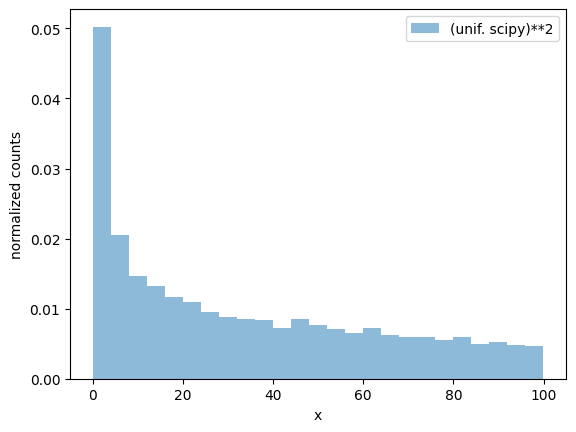

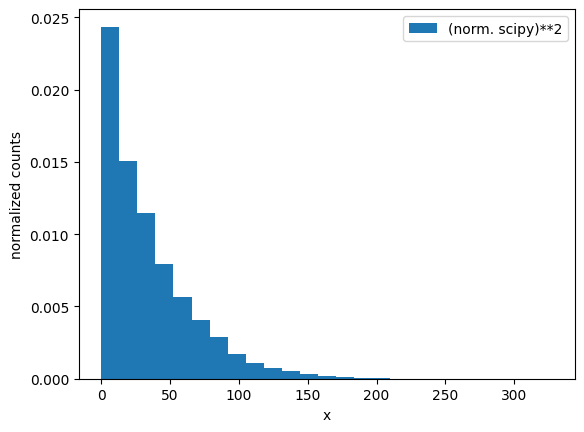

In [2]:
d_unif_squared = [x**2 for x in d_unif2]
d_norm_squared = [x**2 for x in d_norm]

plt.hist(d_unif_squared,bins=25,density=True, label="(unif. scipy)**2",alpha=0.5)
plt.xlabel("x")
plt.ylabel("normalized counts")
plt.legend(loc='best')
plt.show()

plt.hist(d_norm_squared,bins=25,density=True, label="(norm. scipy)**2")
plt.xlabel("x")
plt.ylabel("normalized counts")
plt.legend(loc='best')
plt.show()

### <font color='orange'>**> Python #3**</font>

Fes dues gràfiques on mostris (X,Y) per als dos casos. Calcula el factor de correlació entre les variables $X$ i $Y$ que has generat en els dos exemples anteriors.

<font color='orange'>**Nota**</font> Python té la funció $pearsonr$ per a calcular la correlació entre variables:

```
from scipy.stats import pearsonr
```
`?stats.pearsonr`

Aquesta funció retorna dos valors (Pearson correlation coefficient and p-value for testing non-correlation.). Us heu de quedar amb el primer d'ells. Perquè el segon cas té un factor de correlació menor?

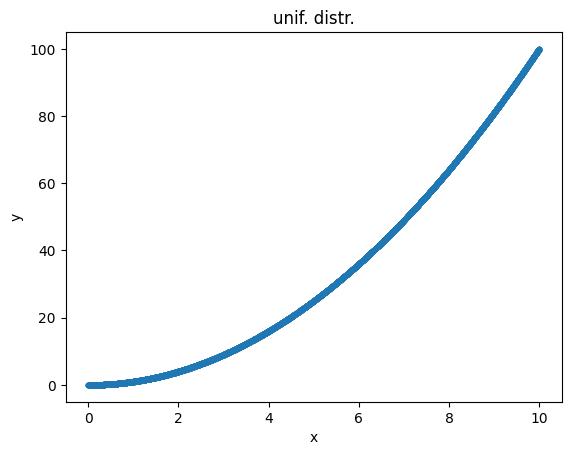

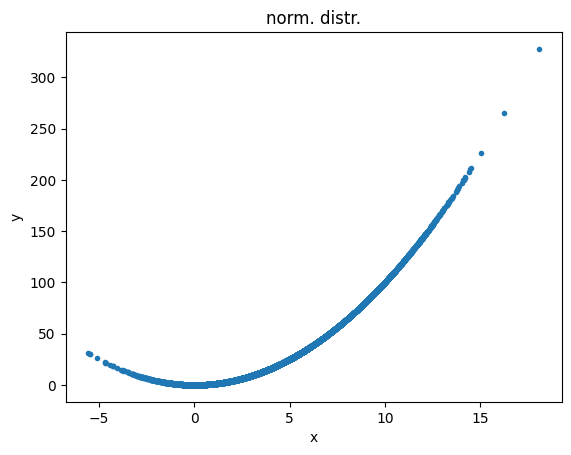

Cas 1: 0.9684639827034836
Cas 2: 0.9236344740888082
En el segon cas, tenim valors negatius de x, i al fer x**2, perdem la correlació per a una fracció de les dades. Si Y=25, X pot ser 5 o -5...
un  4.44 % de les x són negatives en el cas gaussià


In [3]:
from scipy.stats import pearsonr

plt.plot(d_unif2, d_unif_squared,'.')
plt.title("unif. distr.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(d_norm, d_norm_squared,'.')
plt.title("norm. distr.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Cas 1:", pearsonr(d_unif2, d_unif_squared)[0])
print("Cas 2:", pearsonr(d_norm, d_norm_squared)[0])

print("En el segon cas, tenim valors negatius de x, i al fer x**2, perdem la correlació per a una fracció de les dades. Si Y=25, X pot ser 5 o -5...")
p= 100.*sum(x<0 for x in d_norm)/len(d_norm)
print("un ", p , "% de les x són negatives en el cas gaussià")

### <font color='green'>**> ENTREGA**</font>

En aquesta entrega hauràs de generar uns parells de punts, on un té un soroll associat i fa que es desviï d'una recta, és a dir:

$$
y_i = x_i + \epsilon_i
$$

Considerarem dos casos:

* No hi ha soroll $\Rightarrow \epsilon_i = 0$
* El soroll està distribuit com una normal $\Rightarrow \epsilon_i \sim N(0,Z)$

on Z es calcula amb les teves darreres dues xifres del teu NIU, dividit per 10!

Farem unes gràfiques (x,y), calcularem el factor de correlació, i graficarem les distribucions marginals en $x$ i $y$.

---

1) Fes una gràfica d'un conjunt de $N = 10000$ punts $(x,y)$ on els x estan equiespaiats en l'interval $[0,10]$ i $y_i = x_i$ **[1.5 punts]**. També fes un parell de gràfiques de les distribucions marginals en $x$ i $y$, fent histogrames amb 100 bins. **[1.5 punts]**

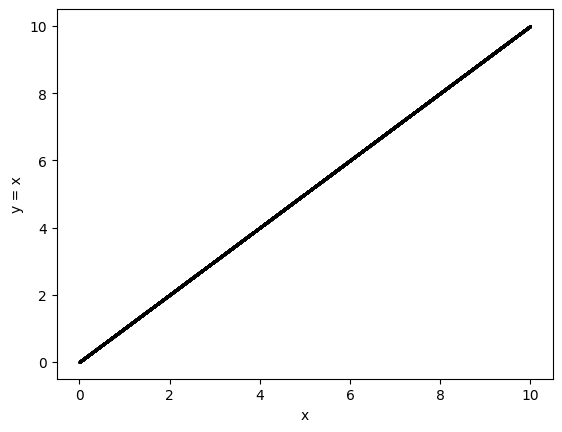

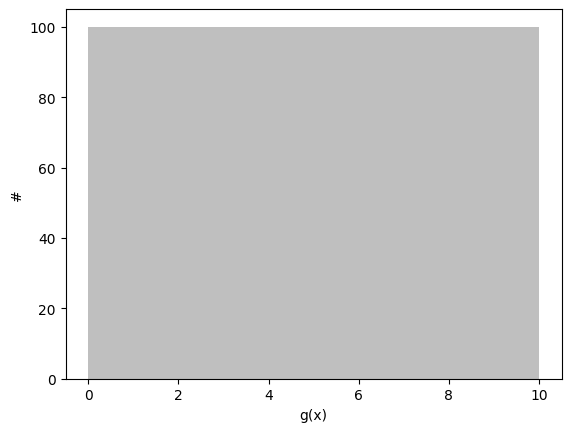

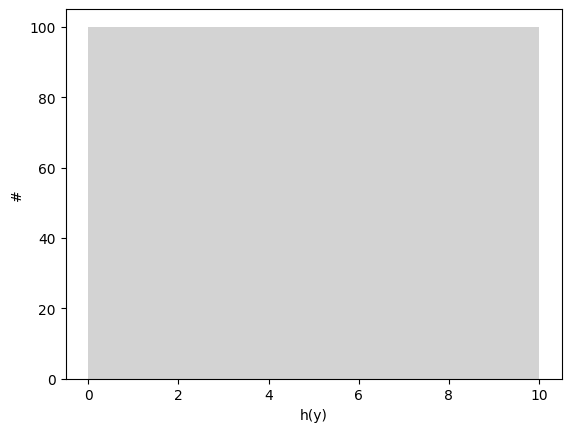

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
x1 = np.linspace(0,10,N) # Aqui tendrias que haber hecho blah....
y1 = x1

plt.plot(x1,y1,'ko',markersize=1)
plt.xlabel("x")
plt.ylabel("y = x")
plt.show()

plt.hist(x1,bins=100, facecolor='grey', alpha=0.5)
plt.xlabel("g(x)")
plt.ylabel("#")
plt.show()

plt.hist(y1,bins=100, facecolor='darkgrey', alpha=0.5)
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show()


2) Fes una gràfica d'un conjunt de $N = 10000$ punts $(x,y)$ on els x estan equiespaiats en l'interval $[0,10]$ i $y_i = x_i + \epsilon_i$, on $\epsilon_i \sim N(0,Z)$ (és a dir, segueix una distribució normal, amb $\mu$ = 0 i $\sigma$ = Z) **[1.5 punts]**. També fes un parell de gràfiques de les distribucions marginals en $x$ i $y$, fent histogrames amb 100 bins. **[1.5 punts]**

<font color='orange'>**Nota**</font> Vam veure que podíem trobar informació sobre les funcions de la normal a scipy amb

`?stats.norm`

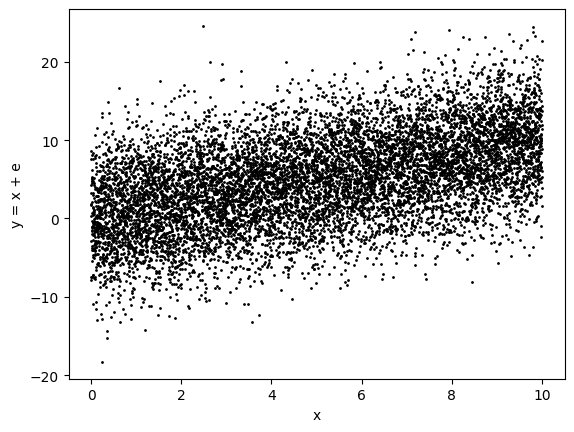

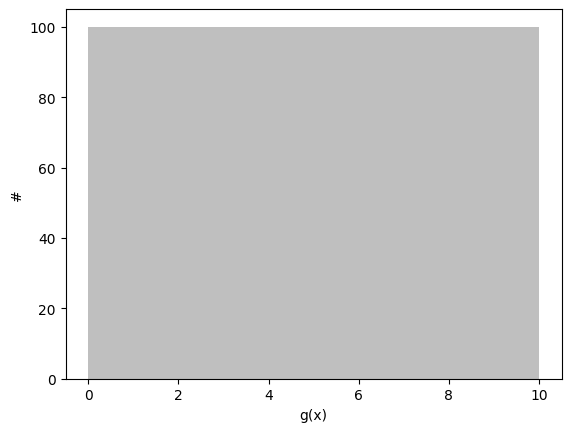

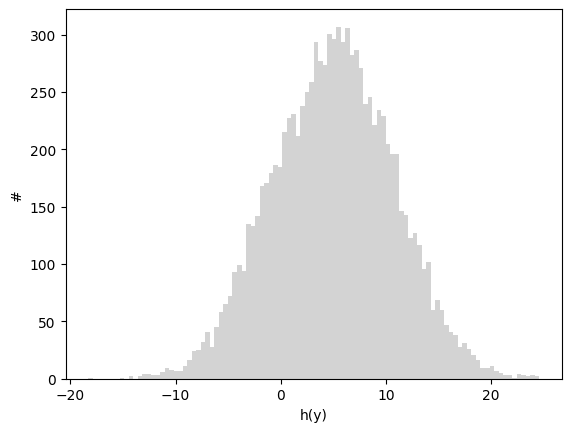

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

N = 10000
x2 = np.linspace(0,10,N)

# Imagimem que el meu NIU acaba en 50, llavors Z=5

e = stats.norm.rvs(loc=0,scale=5,size=N)
y2 = x2 + e

plt.plot(x2,y2,'ko',markersize=1)
plt.xlabel("x")
plt.ylabel("y = x + e")
plt.show()

plt.hist(x2,bins=100, facecolor='grey', alpha=0.5)
plt.xlabel("g(x)")
plt.ylabel("#")
plt.show()

plt.hist(y2,bins=100, facecolor='darkgrey', alpha=0.5)
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show()

Fixeu-vos que aquesta marginal en $y$ no segueix la distribució normal del soroll, ja que és un soroll gaussià que heu afegit a damunt de la recta:

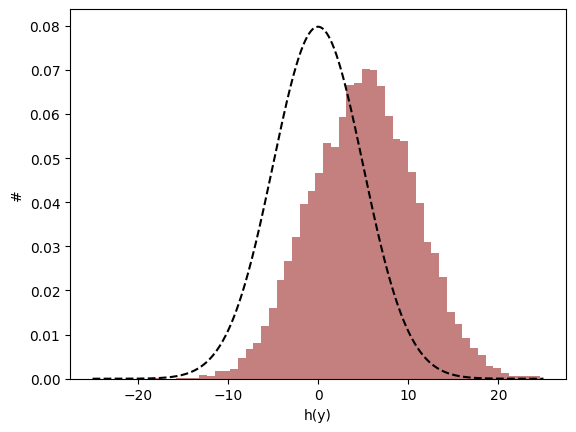

In [6]:
xg = np.linspace(-25,25,1000)
yg_pdf = stats.norm.pdf(xg, loc=0,scale=5) # Evaluo la PDF d'una normal amb mu=0 i sigma=5, per 1000 punts de -25 a 25.

plt.plot(xg, yg_pdf, 'k--')
plt.hist(y2,bins=50, density=True, facecolor='darkred', alpha=0.5) # Poso el density=True per normalitzar l'histograma
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show()

De fet, si a cada punt que poso en aquesta marginal, li resto la part lineal, llavors si que hauria de veure només el soroll que segueix la normal. Anem a veure:

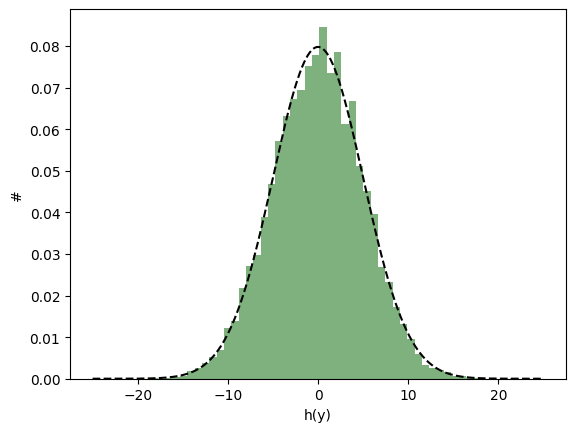

In [7]:
s = y2 - x2 # Si a cada y2 li trec la part x2, em queda només el soroll...

plt.plot(xg, yg_pdf, 'k--')
plt.hist(s,bins=50, density=True, facecolor='darkgreen', alpha=0.5) # Poso el density=True per normalitzar l'histograma
plt.xlabel("h(y)")
plt.ylabel("#")
plt.show() # Ara si!

3) Calcula el factor de correlació entre les variables $x$ i $y$ que has generat en els dos exemples. **[2 punts]**

<font color='orange'>**Nota**</font> Python té la funció $pearsonr$ per a calcular la correlació entre variables:

```
from scipy.stats import pearsonr
```
`?stats.pearsonr`

In [8]:
from scipy.stats import pearsonr

print("Cas 1:", pearsonr(x1, y1)[0])
print("Cas 2:", pearsonr(x2, y2)[0])

print("Veiem que la correlació perfecta es perd si afegim soroll Gaussià")

Cas 1: 1.0
Cas 2: 0.5026921093998888
Veiem que la correlació perfecta es perd si afegim soroll Gaussià


4) Aproximadament quina $\sigma$ ha de tenir el soroll perquè el factor de correlació sigui menor de 0.15? Genera moltes realitzacions amb soroll diferent i calcula el factor de correlació per a cadascuna d'elles per a trobar el cas que es proposa. **[2 punts]**

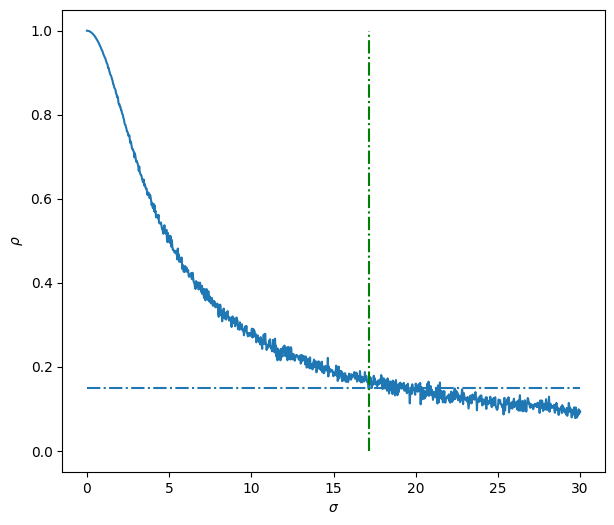

sigma on rho < 0.15 = approx. 17.15


In [9]:
# Generem moltes realitzacions amb soroll diferent i calculem el factor de correlació per a cadascuna

Ns=1000
sigmas = np.linspace(0,30,Ns)

N = 10000
x3 = np.linspace(0,10,N)
corrS = []
sigmaAbove = []

for sigma in sigmas:

  e = stats.norm.rvs(loc=0,scale=sigma,size=N)
  y3 = x3 + e
  corrS.append(pearsonr(x3, y3)[0])
  if corrS[-1] < 0.15:
    sigmaAbove.append(sigma)

plt.figure(figsize=(7, 6))
plt.plot(sigmas,corrS)
plt.hlines(0.15,0,sigmas[-1],linestyles='-.')
plt.vlines(sigmaAbove[0],0,1,color='g',linestyles='-.')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\rho$')
plt.show()

print("sigma on rho < 0.15 = approx. %5.2f" % sigmaAbove[0])